In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
from urllib.request import urlopen

url="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201004"

page=urlopen(url)
soup=BeautifulSoup(page,"html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20201004" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [4]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=192066" title="소년시절의 너">소년시절의 너</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=195975" title="브레이크 더 사일런스: 더 무비">브레이크 더 사일런스: 더 무비</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=85825" title="톰보이">톰보이</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10173" title="사랑과 영혼">사랑과 영혼</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=17942" title="제리 맥과이어">제리 맥과이어</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=17970" title="샤인">샤인</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=195450" title="아웃포스트">아웃포스트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=177335" title="타샤 튜더">타샤 튜더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183866" title="담보">담보</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183772" title="극장판 짱구는 못말려: 신혼여행 허리케인

In [7]:
soup.find_all('div','tit5')[0].a.string

'소년시절의 너'

In [8]:
soup.find_all('td','point')[0].string

'9.39'

In [12]:
date=pd.date_range('2020-9-1',periods=36,freq='D')
date

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12',
               '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
import urllib
from tqdm import tqdm_notebook

movie_date=[]
movie_name=[]
movie_point=[]

for today in tqdm_notebook(date):

    html="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"

    response=urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup=BeautifulSoup(response,"html.parser")

    end=len(soup.find_all('td','point'))
    
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0,end)])


<ipython-input-14-0bfa49fb1850>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date):


In [25]:
movie=pd.DataFrame({'date':movie_date,'name':movie_name,'point':movie_point})

movie.head()

,date,name,point
0,2020-09-01,가버나움,9.59
1,2020-09-01,동주,9.37
2,2020-09-01,소년시절의 너,9.37
3,2020-09-01,다시 태어나도 우리,9.35
4,2020-09-01,소원,9.32


In [35]:
tmp=movie.query('name==["소원"]')
tmp.head()

,date,name,point
4,2020-09-01,소원,9.32
54,2020-09-02,소원,9.32
103,2020-09-03,소원,9.32
152,2020-09-04,소원,9.32
202,2020-09-05,소원,9.32


No handles with labels found to put in legend.


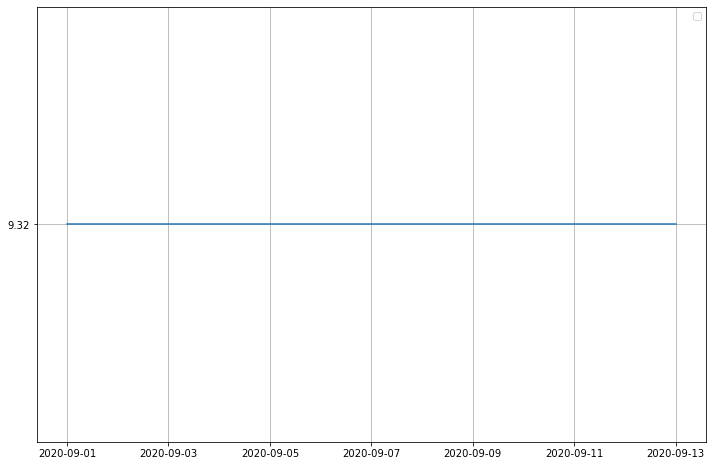

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'],tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()